In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from prophet import Prophet

In [17]:
df = pd.read_csv("daily_csv.csv")
df.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5953 non-null   object 
 1   Price   5953 non-null   float64
dtypes: float64(1), object(1)
memory usage: 93.1+ KB


### Filling Nan value

In [5]:
df["Price"].fillna(df["Price"].mean(), inplace = True)

### Checking if the data is skewd or not

<Figure size 640x480 with 0 Axes>

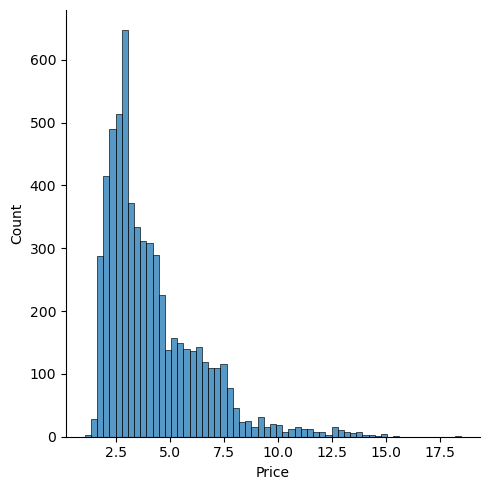

In [20]:
plt.figure()
sns.displot(df["Price"])
plt.show()

In [23]:
df["Price"] = np.sqrt(df["Price"])
skew(df["Price"])

nan

<Figure size 640x480 with 0 Axes>

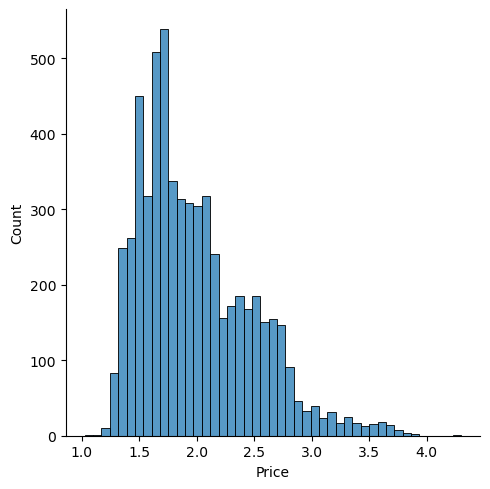

In [24]:
plt.figure()
sns.displot(df["Price"])
plt.show()

## Using Prophet to predict next 365 days price

In [25]:
df.rename(columns={"Date":"ds", "Price":"y"}, inplace = True)

In [26]:
df.head()

,ds,y
0,1997-01-07,1.954482
1,1997-01-08,1.949359
2,1997-01-09,1.900000
3,1997-01-10,1.979899
4,1997-01-13,2.000000


In [27]:
m = Prophet()
m.fit(df)

11:57:44 - cmdstanpy - INFO - Chain [1] start processing
11:57:47 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
future = m.make_future_dataframe(periods=365)

In [29]:
future.tail()

,ds
6313,2021-08-28
6314,2021-08-29
6315,2021-08-30
6316,2021-08-31
6317,2021-09-01


In [31]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6313,2021-08-28,1.654431,1.233738,2.016851
6314,2021-08-29,1.291825,0.869889,1.677572
6315,2021-08-30,1.488187,1.062428,1.853345
6316,2021-08-31,1.495096,1.073963,1.875026
6317,2021-09-01,1.496847,1.058734,1.844287


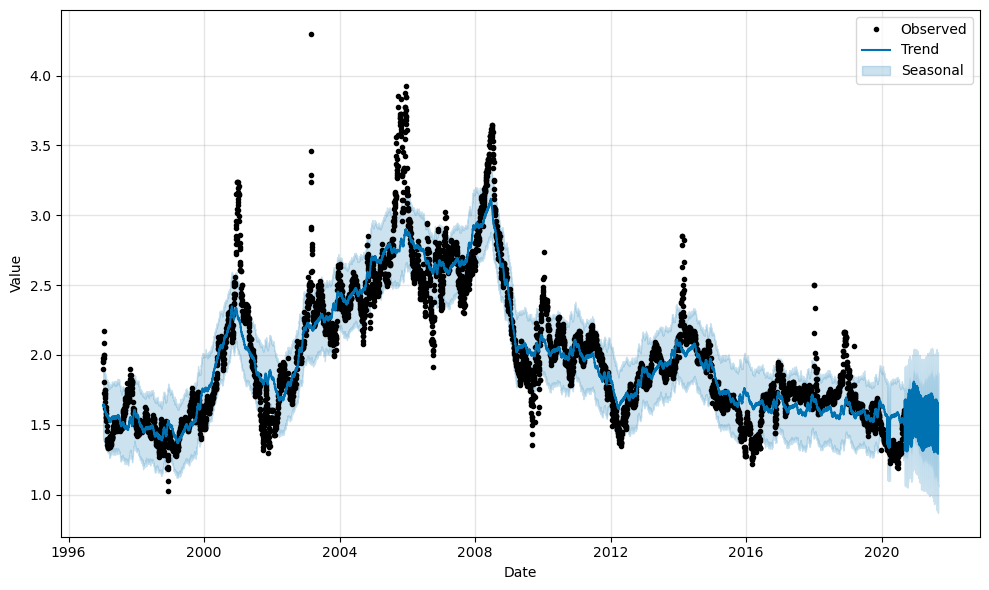

In [37]:
fig1 = m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend(['Observed', 'Trend', 'Seasonal'])

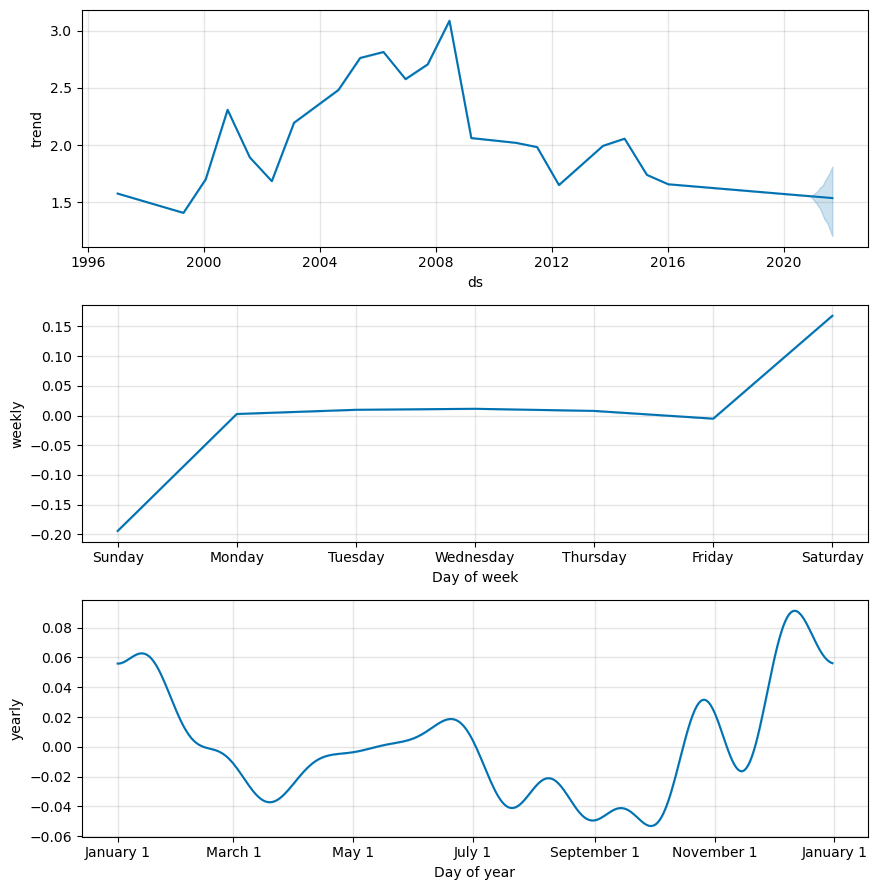

In [36]:
# Checking price graph daily, weekly and monthly
fig2 = m.plot_components(forecast)